In [2]:
from bs4 import BeautifulSoup
import requests
from konlpy.tag import Twitter
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
search_word = "보안"  # 검색어 지정
title_list = []

In [5]:
def get_titles(start_num, end_num):
    # start_num ~ end_num까지 크롤링
    while 1:
        if start_num > end_num:
            break
        print(start_num)
        url = 'https://search.naver.com/search.naver?where=news&sm=tab_jum&query={}&start={}'.format(
            search_word, start_num)
        req = requests.get(url)

        # 정상적인 request 확인
        if req.ok:
            html = req.text
            soup = BeautifulSoup(html, 'html.parser')

            # 뉴스제목 뽑아오기
            titles = soup.select(
                'ul > li > .news_wrap.api_ani_send > div > a'
            )
            print(titles)

            # list에 넣어준다
            for title in titles:
                title_list.append(title['title'])
        start_num += 10
    print(title_list)


In [8]:
def make_wordcloud(word_count):
    twitter = Twitter()

    sentences_tag = []
    # 형태소 분석하여 리스트에 넣기
    for sentence in title_list:
        morph = twitter.pos(sentence)
        sentences_tag.append(morph)
        print(morph)
        print('-' * 30)

    print(sentences_tag)
    print('\n' * 3)

    noun_adj_list = []
    # 명사와 형용사만 구분하여 이스트에 넣기
    for sentence1 in sentences_tag:
        for word, tag in sentence1:
            if tag in ['Noun', 'Adjective']:
                noun_adj_list.append(word)

    # 형태소별 count
    counts = Counter(noun_adj_list)
    tags = counts.most_common(word_count)
    print(tags)

    # wordCloud생성
    # 한글꺠지는 문제 해결하기위해 font_path 지정
    wc = WordCloud(font_path='/Library/Fonts/NanumGothic.ttf',
                   background_color='white', width=800, height=600)
    print(dict(tags))
    cloud = wc.generate_from_frequencies(dict(tags))
    plt.figure(figsize=(10, 8))
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()

', 'Noun'), ('보안', 'Noun'), ('시장', 'Noun'), ('공략', 'Noun')], [('트렌드', 'Noun'), ('마이크로', 'Noun'), (',', 'Punctuation'), ('AWS', 'Alpha'), ('S', 'Alpha'), ('3', 'Number'), ('파일', 'Noun'), ('보안', 'Noun'), ('과', 'Josa'), ('람다', 'Noun'), ('서버', 'Noun'), ('리스', 'Noun'), ('보안', 'Noun'), ('강화', 'Noun')], [('와이', 'Modifier'), ('즈', 'Modifier'), ('유', 'Noun'), ('사이버', 'Noun'), ('보안', 'Noun'), ('학과', 'Noun'), (',', 'Punctuation'), ('실무', 'Noun'), ('형', 'Suffix'), ('화이트', 'Noun'), ('해커', 'Noun'), ('역량', 'Noun'), ('뽐내', 'Verb')], [('와이', 'Modifier'), ('즈', 'Modifier'), ('유', 'Noun'), ('사이버', 'Noun'), ('보안', 'Noun'), ('학과', 'Noun'), (',', 'Punctuation'), ('실무', 'Noun'), ('형', 'Suffix'), ('화이트', 'Noun'), ('해커', 'Noun'), ('역량', 'Noun'), ('뽐내', 'Verb')], [('LG', 'Alpha'), ('CNS', 'Alpha'), (',', 'Punctuation'), ('삼정', 'Noun'), ('KPMG', 'Alpha'), ('와', 'Verb'), ('맞', 'Verb'), ('손', 'Noun'), ('…', 'Punctuation'), ('스마트', 'Noun'), ('팩토리', 'Noun'), ('보안', 'Noun'), ("'", 'Punctuation'), ('공략', 'Noun'), ("'"

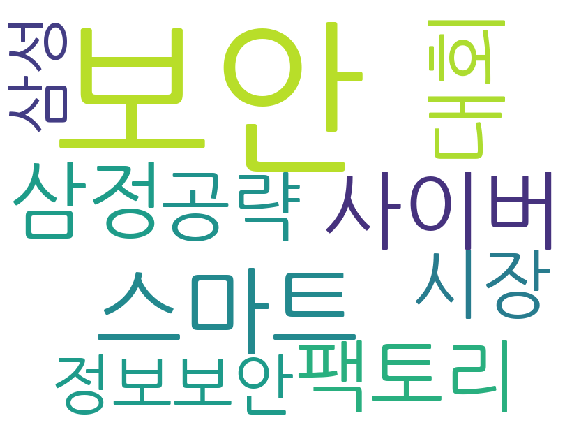

In [9]:
if __name__ == '__main__':
    # 1~200번게시글 까지 크롤링
    get_titles(1, 200)
    # 단어 30개까지 wordcloud로 출력
    make_wordcloud(10)